In [53]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from xgboost import XGBRegressor, plot_importance
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from matplotlib.dates import DateFormatter
pd.options.mode.chained_assignment = None 

In [54]:
def plot_observed_vs_predicted_with_text(y_test, y_pred_test, site, mse, rmse, mae, r2, params, target_col,plot_directory):
    # Plotting the observed vs predicted values for the test set
    plt.figure(figsize=(10, 6))
    plt.plot(pd.to_datetime(y_test.index), y_test, label='Observed', color='blue', linestyle='-')
    plt.plot(pd.to_datetime(y_test.index), y_pred_test, label='Predicted', color='red', linestyle='--')
    plt.xlabel('TIMESTAMP')
    plt.ylabel('Value')
    plt.title('Observed vs Predicted '+site)
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
    plt.gcf().autofmt_xdate()  # Rotate and align the date labels
    plt.text(0.86, 0.81, f'MSE : {mse:.3f}', transform=plt.gca().transAxes)
    plt.text(0.86, 0.76, f'RMSE: {rmse:.3f}', transform=plt.gca().transAxes)
    # plt.text(0.86, 0.71, f'R^2: {r2:.3f}', transform=plt.gca().transAxes)
    plt.text(0.86, 0.71, f'MAE: {mae:.3f}', transform=plt.gca().transAxes)
    plt.text(0.86, 0.66, f'R^2 : {r2:.3f}', transform=plt.gca().transAxes)
    plt.legend()
    plt.grid(True)
    plt.savefig(os.path.join(plot_directory,f"XGBOOST_{site}_{target_col}_{params}.png"))
    plt.show()
    
def plot_observed_vs_predicted_with_text1(y_test, y_pred_test, site, mse, rmse, mae, r2, params, target_col,plot_directory):
    # only for prediction
    # Plotting the observed vs predicted values for the test set
    plt.figure(figsize=(10, 6))
    plt.plot(pd.to_datetime(y_test.index), y_test, label='Observed', color='blue', linestyle='-')
    plt.plot(pd.to_datetime(y_test.index), y_pred_test, label='Predicted', color='red', linestyle='--')
    plt.xlabel('TIMESTAMP')
    plt.ylabel('Value')
    plt.title('Observed vs Predicted '+site)
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    # plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
    plt.gcf().autofmt_xdate()  # Rotate and align the date labels
    plt.text(0.86, 0.81, f'MSE : {mse:.3f}', transform=plt.gca().transAxes)
    plt.text(0.86, 0.76, f'RMSE: {rmse:.3f}', transform=plt.gca().transAxes)
    # plt.text(0.86, 0.71, f'R^2: {r2:.3f}', transform=plt.gca().transAxes)
    plt.text(0.86, 0.71, f'MAE: {mae:.3f}', transform=plt.gca().transAxes)
    plt.text(0.86, 0.66, f'R^2 : {r2:.3f}', transform=plt.gca().transAxes)
    plt.legend()
    plt.grid(True)
    plt.savefig(os.path.join(plot_directory,f"XGBOOST_{site}_{target_col}_{params}.png"))
    plt.show()
    # plt.savefig(f'./plots/{site}_observed_vs_predicted.png')

def XGBoost_train_test_no_L(df, target_col, param_values, params, plot_directory, site, test_size=0.2):

    eta = param_values['eta']
    max_depth = param_values['max_depth']
    min_child_weight = param_values['min_child_weight']
    gamma = param_values['gamma']
    alpha = param_values['alpha']

    # Split data into features (X) and target variable (y)
    X = df.reindex(sorted(df.columns), axis=1).drop(columns=[target_col])  
    y = df[target_col]

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, shuffle=False)

    # Initialize XGBoost model
    model = XGBRegressor(eta=eta,
                         max_depth=max_depth,
                         min_child_weight=min_child_weight,
                         gamma=gamma, 
                         alpha=alpha)

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Calculate Mean Squared Error (MSE)
    mse = mean_squared_error(y_test, y_pred)
    test_r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    print('Mean Squared Error:', mse)
    print('Root Mean Squared Error:', rmse)
    print('MAE:', mae)
    print("Test R^2 Score:", test_r2)

    plot_observed_vs_predicted_with_text(y_test, y_pred, site, mse, rmse, mae, test_r2, params, target_col,plot_directory)

    return model, X_train, X_test, y_train, y_test, y_pred, mse, rmse, mae, test_r2

def XGBoost_train_test_cont_no_L(model, site, df,target_col, test_size=0.2):

    # Split data into features (X) and target variable (y)
    X = df.reindex(sorted(df.columns), axis=1).drop(columns=[target_col])  # Drop the target column
    y = df[target_col]

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, shuffle=False)

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Calculate Mean Squared Error (MSE)
    mse = mean_squared_error(y_test, y_pred)
    test_r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    print('Mean Squared Error:', mse)
    print('Root Mean Squared Error:', rmse)
    print('MAE:', mae)
    print("Test R^2 Score:", test_r2)

    return model, X_train, X_test, y_train, y_test, y_pred, mse,rmse,mae, test_r2

def f_importance(model, X_train, site, params, plot_directory,  target_col = 'GPP_DT_VUT_USTAR50'):
    importance = model.feature_importances_
    importance_dict = {X_train.columns[i]: importance[i] for i in range(len(X_train.columns))}
    sorted_importance = sorted(importance_dict.items(), key=lambda item: item[1], reverse=True)
    print(sorted_importance)
    # Plot feature importance
    plot_importance(model, max_num_features=15)  # Shows top 10 features
    plt.savefig(os.path.join(plot_directory,f"feature_importance_XGBOOST_{site}_{target_col}_{params}.png"))
    plt.show()

def test_predict(model, df, columns, target_col, site, plot_directory,params):

    # Split data into features (X) and target variable (y)
    X = df.reindex(sorted(df.columns), axis=1).drop(columns=[target_col])  # Drop the target column
    # X = df
    y = df[target_col]

    y_pred = model.predict(X)
    mse = mean_squared_error(y, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    print('Mean Squared Error:', mse)  
    print('Root Mean Squared Error:', rmse)
    print('MAE:', mae)
    print("Test R^2 Score:", r2)

    plot_observed_vs_predicted_with_text1(y, y_pred, site, mse, rmse, mae, r2, params, target_col,plot_directory)
    return mse, rmse, mae, r2

# Only for 3 sites
def predict_all_3(model,params,column, plot_directory, directory_data, target_col):
    
    mse_list,rmse_list, mae_list ,r2_list = [],[],[],[]
    
    data1 = pd.read_csv(os.path.join(directory_data, 'Fontainebleau-Barbeau_preprocessed_01012019_07092023.csv'), index_col='TIMESTAMP', parse_dates=['TIMESTAMP']) 
    test1 = data1[column]
    mse1, rmse1, mae1, r21 = test_predict(model, test1, column, target_col, 'Fontainebleau-Barbeau',plot_directory, params)
    mse_list.append(mse1)
    rmse_list.append(rmse1)
    mae_list.append(mae1)
    r2_list.append(r21)

    data2 = pd.read_csv(os.path.join(directory_data, 'Grillenburg_preprocessed_24042017_28092023.csv'), index_col='TIMESTAMP', parse_dates=['TIMESTAMP']) 
    test2 = data2[column]
    mse2, rmse2, mae2, r22 = test_predict(model, test2, column, target_col, 'Grillenburg',plot_directory, params)
    mse_list.append(mse2)
    rmse_list.append(rmse2)
    mae_list.append(mae2)
    r2_list.append(r22)

    data4 = pd.read_csv(os.path.join(directory_data, 'Svartberget_preprocessed_01012019_21102023.csv'), index_col='TIMESTAMP', parse_dates=['TIMESTAMP']) 
    test4 = data4[column] 
    mse4, rmse4, mae4, r24 = test_predict(model,  test4, column, target_col, 'Svartberget',plot_directory, params)
    mse_list.append(mse4)   
    rmse_list.append(rmse4) 
    mae_list.append(mae4) 
    r2_list.append(r24) 

    print('\n')
    print("average MSE", np.mean(mse_list))     
    print("average RMSE", np.mean(rmse_list))
    print("average MAE", np.mean(mae_list))
    print("average R2", np.mean(r2_list))

def retrain_XGBOOST_3(files,columns, target_col, param_values, plot_directory,params,  directory_data):
    
    def setup_model(file_id):
        filename = files[file_id]
        data = pd.read_csv(os.path.join(directory_data, filename), index_col='TIMESTAMP', parse_dates=['TIMESTAMP']) 
        site = filename.split('_')[0] 
        df = data[columns]
        return df, site
    
    def evaluate_model(site, model, X_test, y_test):
        print('\n'+site)
        y_pred = model.predict(X_test)

        mse = mean_squared_error(y_test, y_pred)
        test_r2 = r2_score(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        rmse = np.sqrt(mse)

        print('Mean Squared Error:', mse)
        print('Root Mean Squared Error:', rmse)
        print('MAE:', mae)
        print("Test R^2 Score:", test_r2)
        plot_observed_vs_predicted_with_text(y_test, y_pred, site, mse, rmse, mae, test_r2, params, target_col,plot_directory)

        return mse, test_r2, mae, rmse, y_pred

    def show_uncertainty(site, mse, rmse, mae, test_r2, y_test, y_pred):
        print('\n'+site)
        print('Mean Squared Error:', mse)
        print('Root Mean Squared Error:', rmse)
        print('MAE:', mae)
        print("Test R^2 Score:", test_r2)
        plot_observed_vs_predicted_with_text(y_test, y_pred, site, mse, rmse, mae, test_r2, params, target_col, plot_directory)
        
    print(f'Training and testing the model on the first site')
    df, site0 = setup_model(0)
    model_0, X_train_0, X_test_0, y_train_0, y_test_0, y_pred_0, mse_0, rmse_0, mae_0, test_r2_0 = XGBoost_train_test_no_L(df, target_col, param_values, params, plot_directory, site0, test_size=0.2)
    f_importance(model_0, X_train_0, site0, params, plot_directory)
    
    #-------------------------------------------------------------------------------------
    print('Retraining the model on the second site')
    df, site1 = setup_model(1)
    model_1, X_train_1, X_test_1, y_train_1, y_test_1, y_pred_1, mse_1, rmse_1, mae_1, test_r2_1 = XGBoost_train_test_cont_no_L(model_0, site1, df, target_col, test_size=0.2)
    f_importance(model_1, X_train_1, site1, params, plot_directory)
    
    print('Retesting the model on the first site')
    mse, test_r2, mae, rmse, y_pred_0  = evaluate_model(site0, model_1, X_test_0, y_test_0)
    show_uncertainty(site1, mse_1, rmse_1, mae_1, test_r2_1, y_test_1, y_pred_1)
    #-------------------------------------------------------------------------------------
    
    print('Retraining the model on the third site')
    df, site2 = setup_model(2)
    model_2, X_train_2, X_test_2, y_train_2, y_test_2, y_pred_2, mse_2, rmse_2, mae_2, test_r2_2 = XGBoost_train_test_cont_no_L(model_1, site2, df, target_col, test_size=0.2)
    f_importance(model_2, X_train_2, site2, params, plot_directory) 

    mse_list,rmse_list, mae_list ,r2_list = [],[],[],[]
    
    print('Retesting the model on the first and second site')

    mse, test_r2, mae, rmse, y_pred_0 = evaluate_model(site0, model_2, X_test_0, y_test_0)

    mse_list.append(mse)
    rmse_list.append(rmse)
    mae_list.append(mae)
    r2_list.append(test_r2)

    mse, test_r2, mae, rmse, y_pred_1  = evaluate_model(site1, model_2, X_test_1, y_test_1)

    mse_list.append(mse)
    rmse_list.append(rmse)
    mae_list.append(mae)
    r2_list.append(test_r2)

    show_uncertainty(site2, mse_2, rmse_2, mae_2, test_r2_2, y_test_2, y_pred_2) 

    mse_list.append(mse_2)
    rmse_list.append(rmse_2)
    mae_list.append(mae_2)
    r2_list.append(test_r2_2)

    print('\n')
    print("average MSE", np.mean(mse_list))     
    print("average RMSE", np.mean(rmse_list))
    print("average MAE", np.mean(mae_list))
    print("average R2", np.mean(r2_list))

    return model_2, X_test_0.columns

In [55]:
plot_directory = r"D:\Proyectos2024\Agame\Repository\vlabs\sen2gpp\Output\Plot\XGBOOST_retrain_new"
directory_data = r"D:\Proyectos2024\Agame\Repository\vlabs\sen2gpp\Output\Tables"
directory_model = r"D:\Proyectos2024\Agame\Repository\vlabs\sen2gpp\Output\Model\xgboost_model_all_nogeneral.json" 

files = os.listdir(directory_data)

target_col = 'GPP_DT_VUT_USTAR50'
general = [
'latitude', 
'longitude', 
'elevation', 
'canopy_height', 
'biom_croplands', 
'biom_dbf', 
'biom_enf', 
'biom_grasslands', 
'winter',
'spring', 
'summer', 
'fall']

era_var = [
'LW_IN_ERA',
 'LW_IN_JSB_ERA',
 'PA_ERA',
 'P_ERA',
 'SW_IN_ERA',
 'TA_ERA',
 'VPD_ERA',
 'WS_ERA']

bands = [
 'B1',
 'B2',
 'B3',
 'B4',
 'B5',
 'B6',
 'B7',
 'B8',
 'B8A', 
 'B9',
 'B11',
 'B12']

sentinel = [
 'CLr',
 'EVI',
 'EVI2',
 'LSWI', 
 'MNDVI',
 'MNDWI',
 'NDII',
 'NDVI']

s2 =  sentinel.copy()
s2.append(target_col)

s2_era = sentinel.copy()
s2_era.extend(era_var)
s2_era.append(target_col)

s2_era_general = sentinel.copy()
s2_era_general.extend(general)
s2_era_general.append(target_col)

data = pd.read_csv(os.path.join(directory_data, files[0]), index_col='TIMESTAMP', parse_dates=['TIMESTAMP']) 
s2_all = data.columns.values.tolist()
s2_all = sorted([item for item in s2_all if not (item.endswith('_residual') or 
                                                   item.endswith('_trend') or 
                                                   item.endswith('_season'))])

s2_all = sorted([item for item in s2_all if not (item.startswith('CO2') or 
                                                   item.startswith('H_') or 
                                                   item.startswith('longitude') or 
                                                   item.startswith('latitude') or 
                                                   item.startswith('LE_'))])
s2_all = [item for item in s2_all if item not in bands]
s2_all = [item for item in s2_all if item not in general]


retrain 3 sites then test it in 3 sites and using L=1

eta_0.1_max_depth_4_min_child_weight_5_gamma_0.1_alpha_0.1
Training and testing the model on the first site
Mean Squared Error: 3.555777727037546
Root Mean Squared Error: 1.8856769943544271
MAE: 1.2195635371449145
Test R^2 Score: 0.8798718172381903


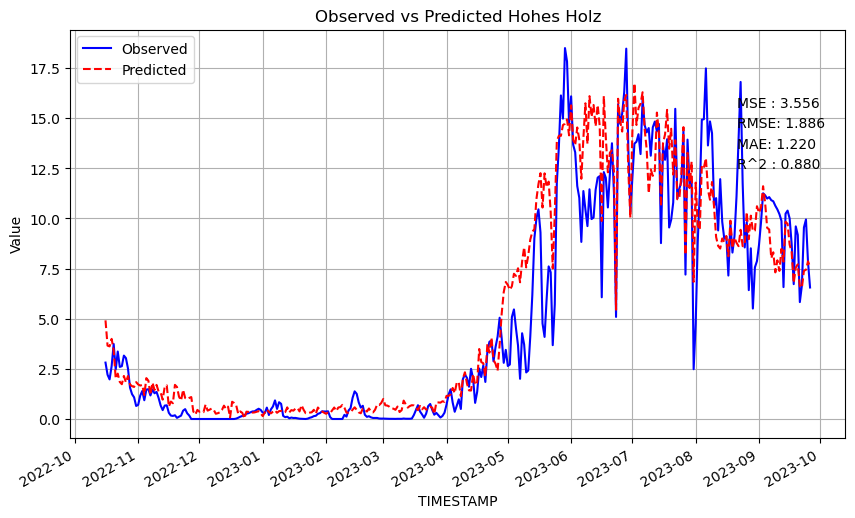

[('NIGHT_RANDUNC_N', 0.56829476), ('EVI', 0.08192361), ('SW_IN_POT', 0.05626863), ('EVI2', 0.030090783), ('SW_IN_F', 0.029720666), ('LSWI', 0.02225594), ('TA_F_MDS_NIGHT', 0.01864121), ('SWC_F_MDS_1', 0.01695628), ('G_F_MDS', 0.0110164), ('MNDVI', 0.010273617), ('TA_ERA_NIGHT', 0.009845279), ('DAY_D', 0.009502905), ('CLr', 0.009383465), ('LW_IN_F_MDS', 0.008397899), ('TA_F_MDS_DAY_SD', 0.0080874255), ('TS_F_MDS_1', 0.0077564716), ('SW_IN_F_MDS', 0.0071190153), ('PPFD_OUT', 0.0070279734), ('SW_IN_ERA', 0.006008867), ('TA_ERA', 0.005914724), ('VPD_F_MDS', 0.0054586874), ('NETRAD', 0.004693456), ('SWC_F_MDS_2', 0.004668446), ('VPD_ERA', 0.00412385), ('VPD_F', 0.00396598), ('NDVI', 0.0033071889), ('MNDWI', 0.003213162), ('TS_F_MDS_3', 0.0029805575), ('TA_ERA_DAY_SD', 0.002978304), ('TS_F_MDS_2', 0.002714675), ('USTAR', 0.0024285584), ('NDII', 0.0022574526), ('P_F', 0.002222674), ('PA_ERA', 0.0021789165), ('LW_IN_JSB', 0.0017842419), ('PA_F', 0.0017628893), ('SW_OUT', 0.0017612117), ('LW_IN

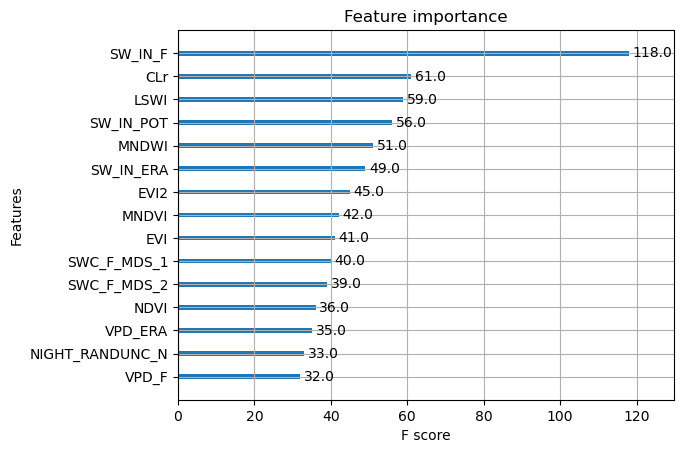

Retraining the model on the second site
Mean Squared Error: 0.7741212510017769
Root Mean Squared Error: 0.879841605632387
MAE: 0.5109541090047985
Test R^2 Score: 0.911668598251867
[('TS_F_MDS_1', 0.59360325), ('CLr', 0.07828992), ('NIGHT_RANDUNC_N', 0.03237017), ('TS_F_MDS_2', 0.028512543), ('MNDVI', 0.022790194), ('SW_IN_F', 0.01574547), ('G_F_MDS', 0.013169422), ('month', 0.012362444), ('EVI', 0.01086317), ('MNDWI', 0.010495927), ('SW_OUT', 0.009888194), ('DAY_D', 0.008722545), ('LW_OUT', 0.008315046), ('SW_IN_POT', 0.00774527), ('SW_IN_F_MDS', 0.0074351104), ('NETRAD', 0.007082232), ('TA_ERA', 0.0068671186), ('WS_ERA', 0.0068259854), ('TA_F', 0.006714975), ('SW_IN_ERA', 0.006239758), ('NDVI', 0.0061113215), ('EVI2', 0.006055652), ('PPFD_IN', 0.0058345743), ('TA_F_DAY_SD', 0.005425574), ('TA_ERA_NIGHT', 0.0049665547), ('LSWI', 0.004916249), ('P_F', 0.0043996833), ('USTAR', 0.0041676746), ('SWC_F_MDS_2', 0.003942233), ('DAY_RANDUNC_N', 0.003903124), ('SWC_F_MDS_1', 0.0037680052), ('WS

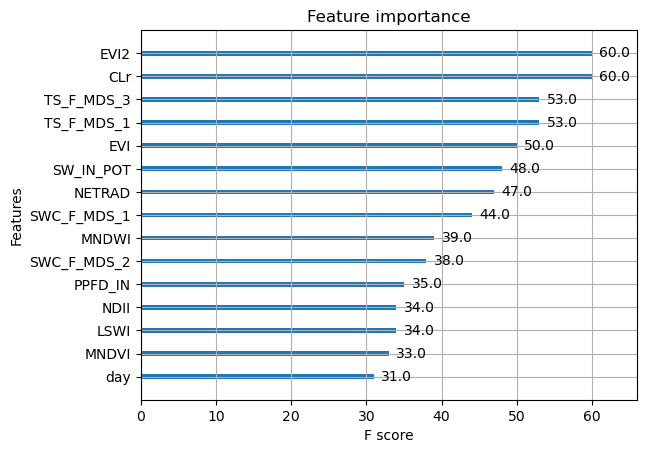

Retesting the model on the first site

Hohes Holz
Mean Squared Error: 11.095078343143147
Root Mean Squared Error: 3.330927549969099
MAE: 2.3342571096939113
Test R^2 Score: 0.625164534659446


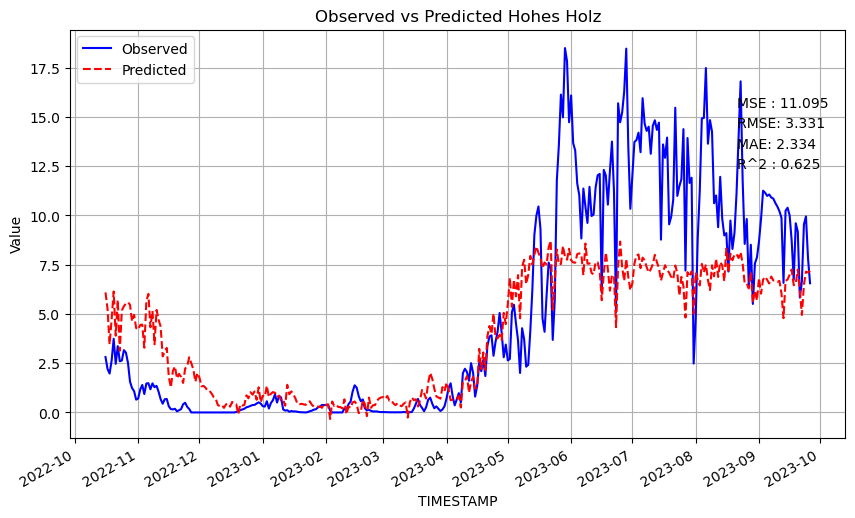


Torgnon
Mean Squared Error: 0.7741212510017769
Root Mean Squared Error: 0.879841605632387
MAE: 0.5109541090047985
Test R^2 Score: 0.911668598251867


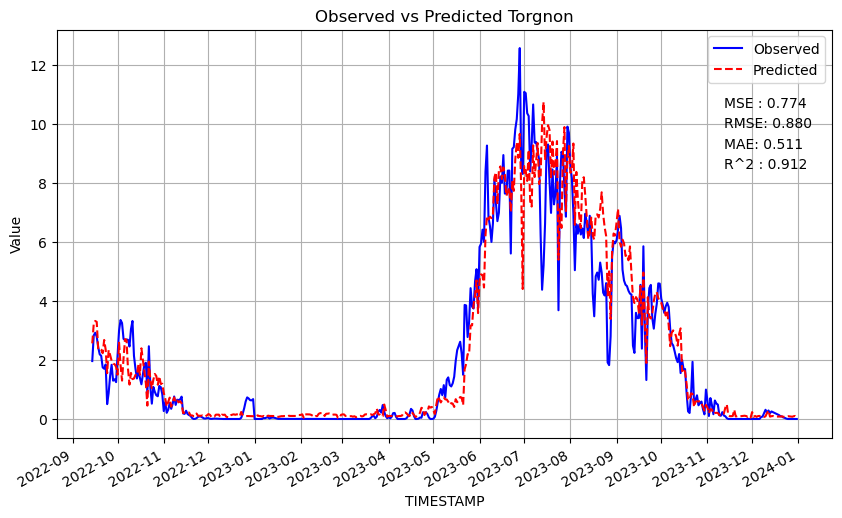

Retraining the model on the third site
Mean Squared Error: 1.1792934509492699
Root Mean Squared Error: 1.0859527848618786
MAE: 0.662050047834438
Test R^2 Score: 0.8947883454359584
[('TA_F', 0.7120624), ('DAY_D', 0.08299445), ('MNDVI', 0.02916513), ('SW_IN_POT', 0.026419591), ('SW_IN_F', 0.0242148), ('SWC_F_MDS_2', 0.012051611), ('VPD_ERA', 0.008890522), ('VPD_F', 0.008561236), ('LSWI', 0.0076070977), ('TA_F_MDS_NIGHT', 0.0069960584), ('CLr', 0.006750612), ('NIGHT_RANDUNC_N', 0.005857888), ('NETRAD', 0.005755714), ('TS_F_MDS_1', 0.0056155436), ('SW_IN_ERA', 0.005286535), ('G_F_MDS', 0.0052791666), ('TS_F_MDS_3', 0.0042899176), ('TS_F_MDS_2', 0.0037420366), ('SWC_F_MDS_1', 0.0036600798), ('TA_F_MDS_DAY_SD', 0.0027507888), ('LW_IN_F', 0.0022638966), ('PPFD_IN', 0.0021087697), ('NDII', 0.0017111194), ('month', 0.0016873492), ('TA_ERA_NIGHT', 0.0016239942), ('LW_IN_JSB_F', 0.0014270913), ('MNDWI', 0.0012378603), ('USTAR', 0.0010690024), ('day', 0.0010536384), ('TA_F_NIGHT', 0.0010127802), (

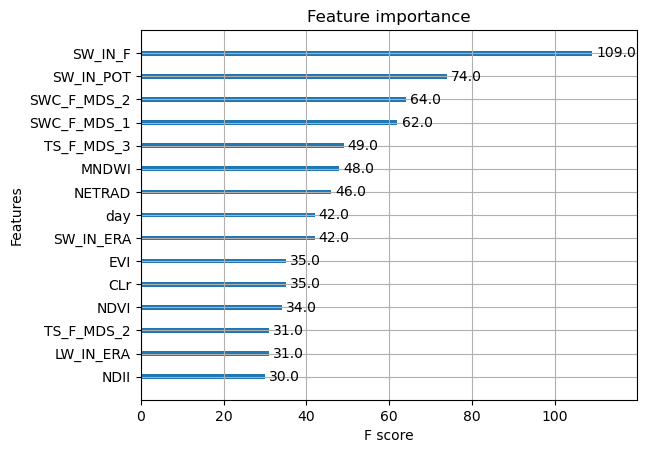

Retesting the model on the first and second site

Hohes Holz
Mean Squared Error: 6.652056644299912
Root Mean Squared Error: 2.5791581270445425
MAE: 1.8209395947489981
Test R^2 Score: 0.7752673148740008


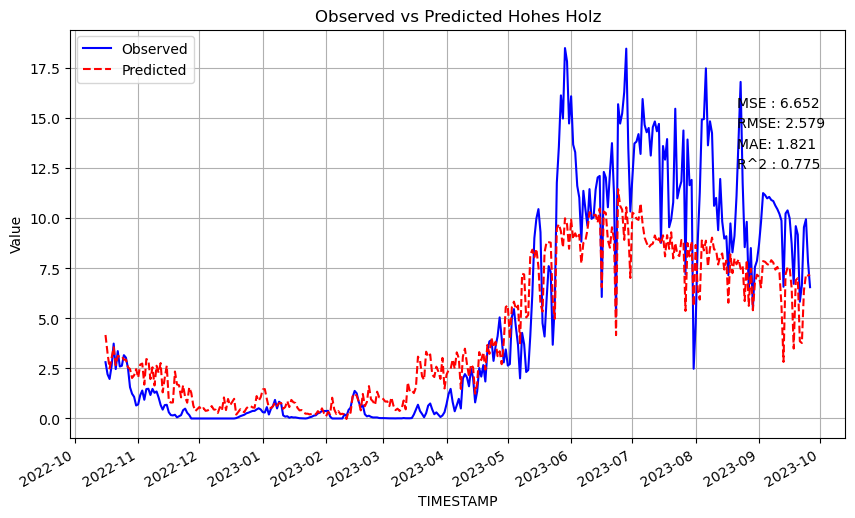


Torgnon
Mean Squared Error: 1.4808382498087638
Root Mean Squared Error: 1.216896975840093
MAE: 0.8467207547120027
Test R^2 Score: 0.8310283845087727


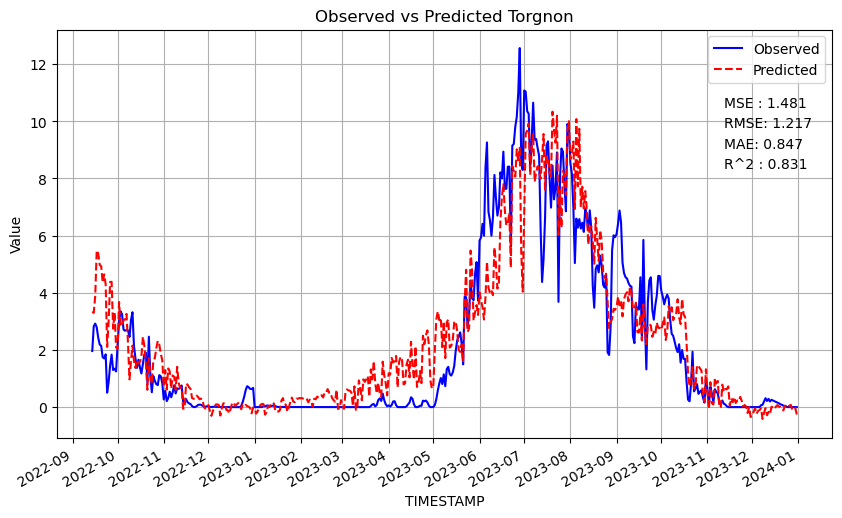


Hyytiala
Mean Squared Error: 1.1792934509492699
Root Mean Squared Error: 1.0859527848618786
MAE: 0.662050047834438
Test R^2 Score: 0.8947883454359584


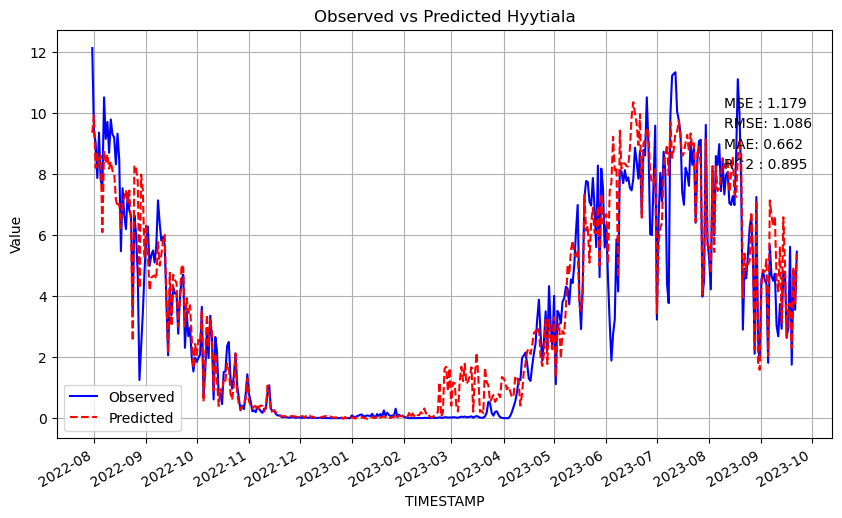



average MSE 3.104062781685982
average RMSE 1.6273359625821715
average MAE 1.1099034657651463
average R2 0.8336946816062439
Mean Squared Error: 4.381924593818292
Root Mean Squared Error: 2.0933047063956773
MAE: 1.5461604136906377
Test R^2 Score: 0.7923646214389303


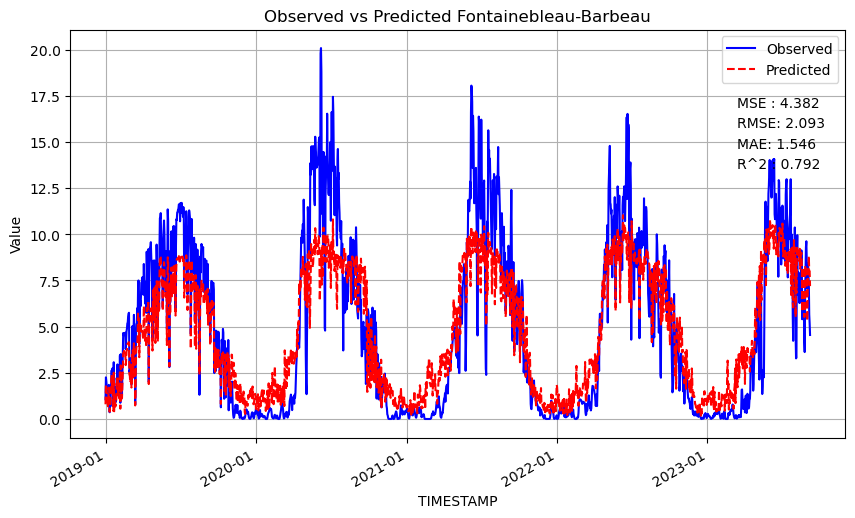

Mean Squared Error: 5.754420147138046
Root Mean Squared Error: 2.3988372489891945
MAE: 1.5672717435654893
Test R^2 Score: 0.6161482437709633


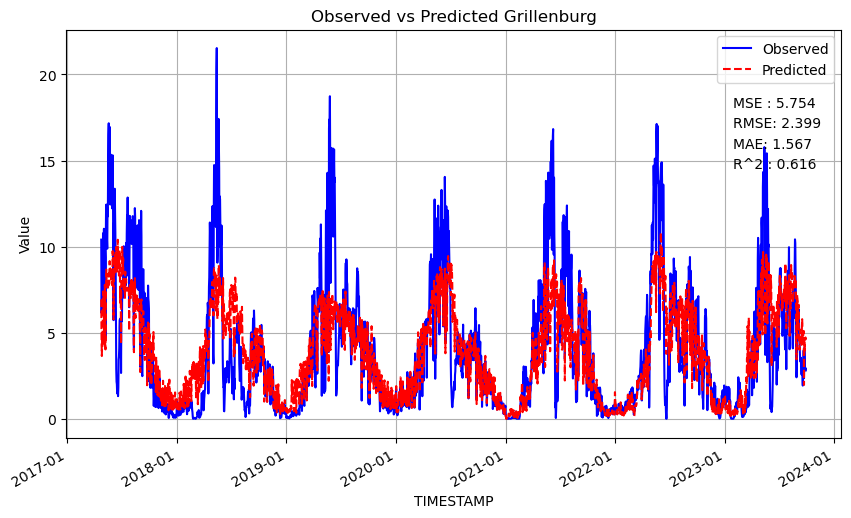

Mean Squared Error: 2.013223749333136
Root Mean Squared Error: 1.4188811611030487
MAE: 0.9097886785284003
Test R^2 Score: 0.8301372083770655


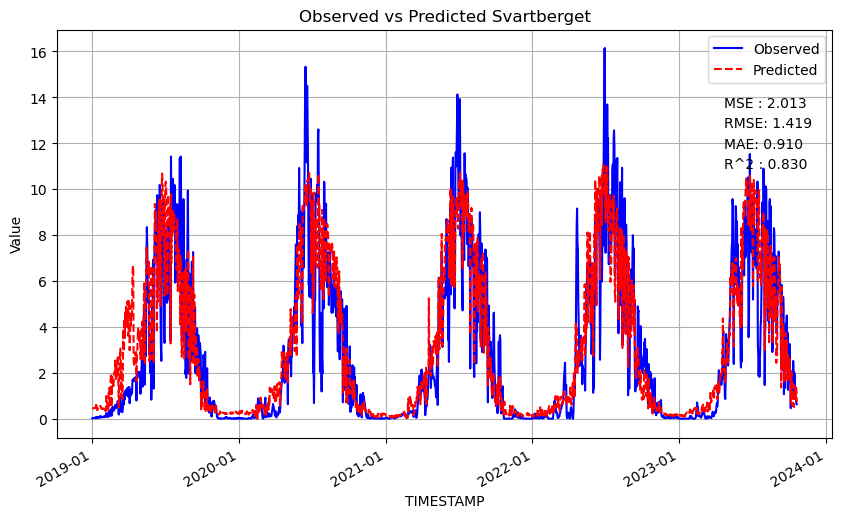



average MSE 4.049856163429825
average RMSE 1.970341038829307
average MAE 1.3410736119281756
average R2 0.746216691195653


In [56]:
# Columns used for features
column = s2_all

# Parameters needed for XGBOOST
eta = 0.1
max_depth = 4
min_child_weight = 5
gamma = 0.1
alpha = 0.1 

param_values = {'eta': 0.1,
              'max_depth': 4,
              'min_child_weight': 5,
              'gamma': 0.1,
              'alpha': 0.1 
}

# training sites
files =[
 'Hohes Holz_preprocessed_01012019_26092023.csv',
 'Torgnon_preprocessed_06072017_31122023.csv',
 'Hyytiala_preprocessed_01012018_22092023.csv'
 ]

params = f"eta_{eta}_max_depth_{max_depth}_min_child_weight_{min_child_weight}_gamma_{gamma}_alpha_{alpha}"
print(params)
model, features = retrain_XGBOOST_3(files,column, target_col, param_values, plot_directory, params, directory_data)
predict_all_3(model,params,column,plot_directory, directory_data, target_col)

model.save_model(directory_model)